In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [2]:
dataset = pd.read_csv("./dados/Despesas_Credor_2018.csv", sep=';')

In [3]:
dataset.head()

,Exportado em: 11/09/2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Transparência Fly,Unnamed: 9
0,Raposos - MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PREFEITURA MUNICIPAL DE RAPOSOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Despesas por credor,NaN,NaN,NaN,NaN,Última atualização: 11/09/2020 11:39:36,NaN,NaN,NaN,NaN
3,Filtros utilizados para elaboração da consulta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Despesas por credor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.shape

(659, 10)

In [5]:
dataset = dataset.drop([0,1,2,3,4,5,658])

In [6]:
dataset.head()

,Exportado em: 11/09/2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Transparência Fly,Unnamed: 9
6,3 PODERES COMERCIO LTDA ME,"557,60","0,00","40,80","0,00",NaN,"0,00","598,40",NaN,"0,00"
7,ACACIA COMERCIO DE MEDICAMENTOS LTDA,"158.800,60","34.998,33","68.520,19","220.267,91",NaN,"0,00","227.320,79",NaN,"255.266,24"
8,ACCUMED PRODUTOS MEDICO HOSPITALARES LTDA,"0,00","0,00","700,00","0,00",NaN,"0,00","700,00",NaN,"0,00"
9,ACTCON COMÉRCIO DE PRODUTOS DE INFORMÁTI,"5.775,00","525,00","525,00","0,00",NaN,"0,00","6.300,00",NaN,"525,00"
10,ADÃO CESÁRIO RAMOS,"0,00","3.048,04","0,00","0,00",NaN,"0,00","0,00",NaN,"3.048,04"


In [7]:
dataset.columns = ['creador', 'Pagamentos do ano (a) (R$)', 'Saldo a pagar do ano (b) (R$)', 'Pagamento de restos (c) (R$)',
                   'Saldo de restos a pagar (d) (R$)','Sem nome 1','Cancelamento de restos (R$)', 
                   'Pagamento total (a + c) (R$)','Sem Nome 2','Saldo a pagar (b + d) (R$)']

In [8]:
dataset.head()

,creador,Pagamentos do ano (a) (R$),Saldo a pagar do ano (b) (R$),Pagamento de restos (c) (R$),Saldo de restos a pagar (d) (R$),Sem nome 1,Cancelamento de restos (R$),Pagamento total (a + c) (R$),Sem Nome 2,Saldo a pagar (b + d) (R$)
6,3 PODERES COMERCIO LTDA ME,"557,60","0,00","40,80","0,00",NaN,"0,00","598,40",NaN,"0,00"
7,ACACIA COMERCIO DE MEDICAMENTOS LTDA,"158.800,60","34.998,33","68.520,19","220.267,91",NaN,"0,00","227.320,79",NaN,"255.266,24"
8,ACCUMED PRODUTOS MEDICO HOSPITALARES LTDA,"0,00","0,00","700,00","0,00",NaN,"0,00","700,00",NaN,"0,00"
9,ACTCON COMÉRCIO DE PRODUTOS DE INFORMÁTI,"5.775,00","525,00","525,00","0,00",NaN,"0,00","6.300,00",NaN,"525,00"
10,ADÃO CESÁRIO RAMOS,"0,00","3.048,04","0,00","0,00",NaN,"0,00","0,00",NaN,"3.048,04"


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652 entries, 6 to 657
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   creador                           652 non-null    object 
 1   Pagamentos do ano (a) (R$)        652 non-null    object 
 2   Saldo a pagar do ano (b) (R$)     652 non-null    object 
 3   Pagamento de restos (c) (R$)      652 non-null    object 
 4   Saldo de restos a pagar (d) (R$)  652 non-null    object 
 5   Sem nome 1                        0 non-null      object 
 6   Cancelamento de restos (R$)       652 non-null    object 
 7   Pagamento total (a + c) (R$)      652 non-null    object 
 8   Sem Nome 2                        0 non-null      float64
 9   Saldo a pagar (b + d) (R$)        652 non-null    object 
dtypes: float64(1), object(9)
memory usage: 56.0+ KB


In [10]:
dataset['Pagamentos do ano (a) (R$)'] = dataset['Pagamentos do ano (a) (R$)'].apply(lambda x:str(x).replace('.',''))

In [11]:
dataset['Pagamentos do ano (a) (R$)'] = dataset['Pagamentos do ano (a) (R$)'].apply(lambda x:str(x).replace('R$',''))

In [12]:
dataset['Pagamentos do ano (a) (R$)']

6         557,60
7      158800,60
8           0,00
9        5775,00
10          0,00
         ...    
653     63888,22
654     36383,45
655      2587,22
656      2252,57
657         0,00
Name: Pagamentos do ano (a) (R$), Length: 652, dtype: object

In [13]:
dataset['Pagamentos do ano (a) (R$)'] = dataset['Pagamentos do ano (a) (R$)'].apply(lambda x:str(x).replace(',','.'))

In [14]:
dataset['Pagamentos do ano (a) (R$)']

6         557.60
7      158800.60
8           0.00
9        5775.00
10          0.00
         ...    
653     63888.22
654     36383.45
655      2587.22
656      2252.57
657         0.00
Name: Pagamentos do ano (a) (R$), Length: 652, dtype: object

In [15]:
dataset['Pagamentos do ano (a) (R$)'] = dataset['Pagamentos do ano (a) (R$)'].astype('float')

In [16]:
dataset['Pagamentos do ano (a) (R$)'].describe()

count    6.520000e+02
mean     4.112737e+04
std      4.327123e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.224300e+03
75%      1.185000e+04
max      1.061989e+07
Name: Pagamentos do ano (a) (R$), dtype: float64

Text(0.5, 1.0, 'Pagamentos do ano (a) (R$)')

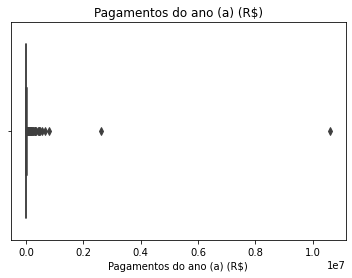

In [17]:
srn.boxplot(dataset['Pagamentos do ano (a) (R$)']).set_title('Pagamentos do ano (a) (R$)')

Text(0.5, 1.0, 'Pagamentos do ano (a) (R$)')

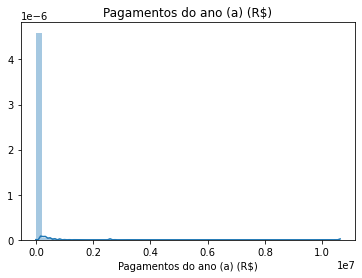

In [19]:
srn.distplot(dataset['Pagamentos do ano (a) (R$)']).set_title('Pagamentos do ano (a) (R$)')

In [32]:
mediana = sts.median(dataset['Pagamentos do ano (a) (R$)'])
mediana

1224.3

In [33]:
dataset.loc[dataset['Pagamentos do ano (a) (R$)'] == 0, 'Pagamento do ano (a) (R$)']= mediana 

Text(0.5, 1.0, 'Pagamentos do ano (a) (R$)')

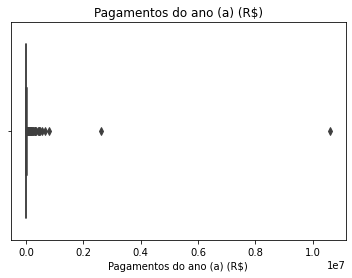

In [34]:
srn.boxplot(dataset['Pagamentos do ano (a) (R$)']).set_title('Pagamentos do ano (a) (R$)')

Text(0.5, 1.0, 'Pagamentos do ano (a) (R$)')

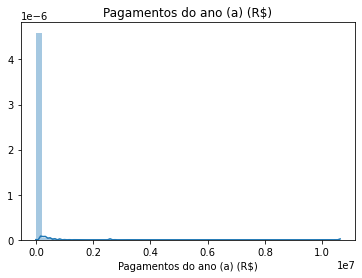

In [35]:
srn.distplot(dataset['Pagamentos do ano (a) (R$)']).set_title('Pagamentos do ano (a) (R$)')